In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = 'data.csv'
data = pd.read_csv(data_path)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33699 entries, 0 to 33698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pt_ID            33699 non-null  int64  
 1   gender           33694 non-null  float64
 2   diagnosis        33264 non-null  float64
 3   hosp_admin       32573 non-null  float64
 4   age_band_jan1    33265 non-null  object 
 5   bmi              20403 non-null  float64
 6   smoker           22210 non-null  object 
 7   past_smoker      19072 non-null  object 
 8   diet_preference  22159 non-null  object 
 9   cancer           1481 non-null   object 
 10  heart_disease    1378 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 2.8+ MB
None


,pt_ID,gender,diagnosis,hosp_admin,age_band_jan1,bmi,smoker,past_smoker,diet_preference,cancer,heart_disease
0,0,2.0,2.0,2.0,55-59,25.2,No,Yes,No_pref,NaN,NaN
1,1,1.0,1.0,2.0,50-54,31.2,No,Yes,No_pref,NaN,NaN
2,2,1.0,2.0,1.0,30-34,28.4,No,Yes,No_pref,NaN,NaN
3,3,2.0,1.0,2.0,50-54,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2.0,2.0,2.0,50-54,28.6,No,No,No_pref,NaN,NaN


# Question 1: show the age of participants and BMI


In [3]:
def bmi_to_cat(bmi):
    cat = ''
    if bmi <= 18.5:
        cat = 'underweight'
    elif bmi <= 24.9:
        cat = 'healthy weight'
    elif bmi <= 29.9:
        cat = 'overweight'
    elif bmi <= 39.9:
        cat = 'obese'
    else:
        cat = 'severely obese'
    return cat

In [4]:
data_q1 = data[['pt_ID', 'age_band_jan1', 'bmi']]
data_q1['bmi_categories'] = data_q1.bmi.apply(bmi_to_cat)
del data_q1['bmi']
data_q1.head()

/tmp/ipykernel_7448/4111933477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_q1['bmi_categories'] = data_q1.bmi.apply(bmi_to_cat)


,pt_ID,age_band_jan1,bmi_categories
0,0,55-59,overweight
1,1,50-54,obese
2,2,30-34,overweight
3,3,50-54,severely obese
4,4,50-54,overweight


In [5]:
data_q1 = data_q1.groupby(['age_band_jan1', 'bmi_categories']).count().reset_index()
data_q1.columns = [*data_q1.columns[:-1], 'count']
data_q1.head()

,age_band_jan1,bmi_categories,count
0,15-19,healthy weight,59
1,15-19,obese,4
2,15-19,overweight,14
3,15-19,severely obese,119
4,15-19,underweight,18


In [6]:
data_q1 = pd.pivot_table(data_q1, values='count', index='age_band_jan1', columns='bmi_categories')\
.reset_index()

data_q1.head()

bmi_categories,age_band_jan1,healthy weight,obese,overweight,severely obese,underweight
0,15-19,59,4,14,119,18
1,20-24,586,66,159,844,78
2,25-29,839,168,367,1400,74
3,30-34,920,259,480,1509,57
4,35-39,840,308,579,1556,49


In [7]:
data_q1.iloc[:, 1:] = data_q1.iloc[:, 1:].div(data_q1.sum(axis=1), axis=0)
data_q1 = \
data_q1[['age_band_jan1', 'underweight', 'healthy weight', 'overweight', 'obese', 'severely obese']]
data_q1.head()

/tmp/ipykernel_7448/4028084570.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_q1.iloc[:, 1:] = data_q1.iloc[:, 1:].div(data_q1.sum(axis=1), axis=0)


bmi_categories,age_band_jan1,underweight,healthy weight,overweight,obese,severely obese
0,15-19,0.084112,0.275701,0.065421,0.018692,0.556075
1,20-24,0.045009,0.338142,0.091748,0.038084,0.487017
2,25-29,0.025983,0.294593,0.128862,0.058989,0.491573
3,30-34,0.017674,0.285271,0.148837,0.080310,0.467907
4,35-39,0.014706,0.252101,0.173770,0.092437,0.466987


Text(0.5, 1.0, 'BMI categories')

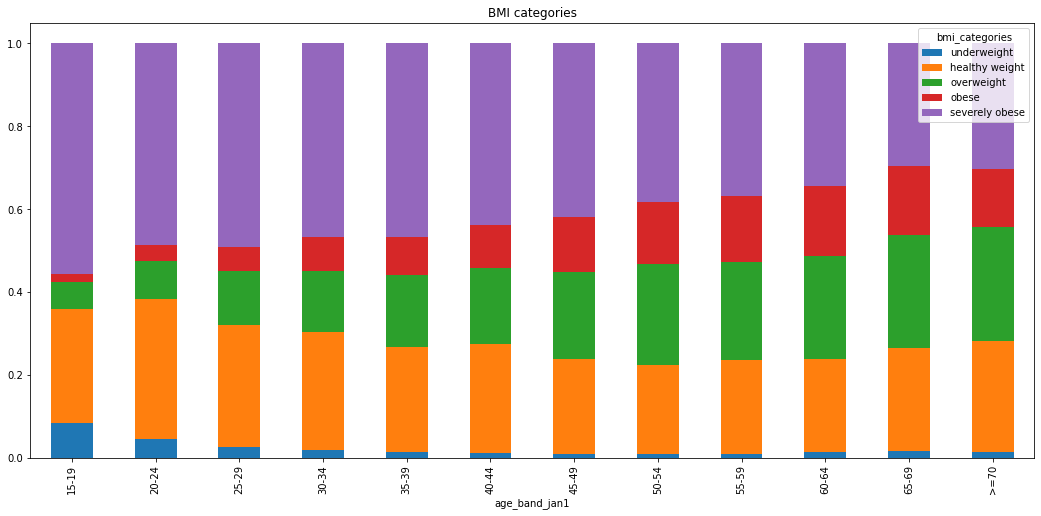

In [8]:
data_q1.plot(
x='age_band_jan1',
kind = 'bar',
stacked = True,
figsize=(18,8))

plt.title('BMI categories')

# Question 2: Which type of IBD tends to have sufferers of a higher BMI?


<AxesSubplot:xlabel='diagnosis', ylabel='bmi'>

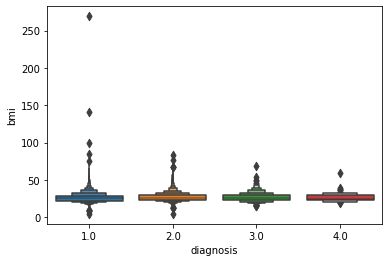

In [9]:
sns.boxenplot(data=data, x='diagnosis', y='bmi')

In [10]:
data_q2 = data[['diagnosis', 'bmi']].groupby('diagnosis').agg(['count', 'min', 'mean', 'median', 'max'])
data_q2.columns = ['count', 'min_v', 'mean_v', 'median_v', 'max_v']
data_q2.reset_index(inplace=True)
data_q2.diagnosis = data_q2.diagnosis.astype(int)
data_q2.head()

,diagnosis,count,min_v,mean_v,median_v,max_v
0,1,9727,4.5,26.357746,25.3,269.1
1,2,9807,4.8,26.795330,25.9,83.2
2,3,641,14.6,26.558190,25.7,68.6
3,4,49,19.2,26.877551,24.9,59.0


Text(0, 0.5, 'BMI')

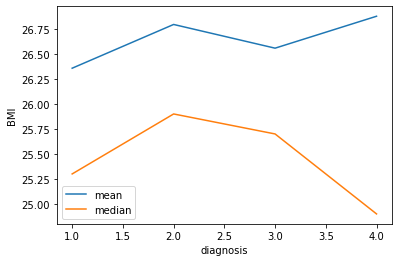

In [11]:
#sns.lineplot(data=data_q2, x='diagnosis', y='min_v')
sns.lineplot(data=data_q2, x='diagnosis', y='mean_v', label='mean')
sns.lineplot(data=data_q2, x='diagnosis', y='median_v', label='median')
#sns.lineplot(data=data_q2, x='diagnosis', y='max_v')
plt.legend()
plt.ylabel('BMI')

# Question 3: Which type of IBD has more sufferers that smoke or previously smoked?


In [12]:
data_q3 = data[['diagnosis', 'smoker', 'past_smoker']].copy()
data_q3.smoker = data_q3.smoker == 'Yes'
data_q3.past_smoker = data_q3.past_smoker == 'Yes'
data_q3['smoker_or_past'] = np.logical_or(data_q3.smoker, data_q3.past_smoker)
data_q3.head()

,diagnosis,smoker,past_smoker,smoker_or_past
0,2.0,False,True,True
1,1.0,False,True,True
2,2.0,False,True,True
3,1.0,False,False,False
4,2.0,False,False,False


In [13]:
data_q3 = data_q3[['diagnosis', 'smoker_or_past']].groupby('diagnosis').agg(['count', 'mean', 'median'])
data_q3.columns = ['count_v', 'mean_v', 'median_v']
data_q3.reset_index(inplace=True)
data_q3.head()

,diagnosis,count_v,mean_v,median_v
0,1.0,16418,0.347058,0.0
1,2.0,15777,0.359637,0.0
2,3.0,991,0.355197,0.0
3,4.0,78,0.397436,0.0


Text(0, 0.5, 'smoke %')

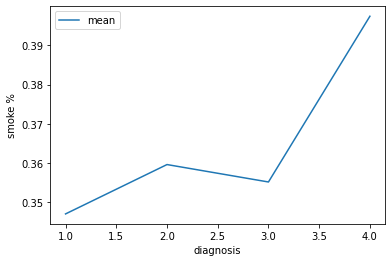

In [14]:
sns.lineplot(data=data_q3, x='diagnosis', y='mean_v', label='mean')
plt.ylabel('smoke %')

# Question 4: Which type of IBD has more cancer sufferers?


In [15]:
data_q4 = data[['diagnosis', 'cancer']].copy()
data_q4.cancer = data_q4.cancer == 'Yes'
data_q4.head()

,diagnosis,cancer
0,2.0,False
1,1.0,False
2,2.0,False
3,1.0,False
4,2.0,False


In [16]:
data_q4 = data_q4.groupby('diagnosis').agg(['mean', 'median'])
data_q4.columns = ['mean_v', 'median_v']
data_q4.reset_index(inplace=True)
data_q4.head()

,diagnosis,mean_v,median_v
0,1.0,0.040322,0.0
1,2.0,0.047854,0.0
2,3.0,0.053481,0.0
3,4.0,0.012821,0.0


Text(0, 0.5, 'cancer %')

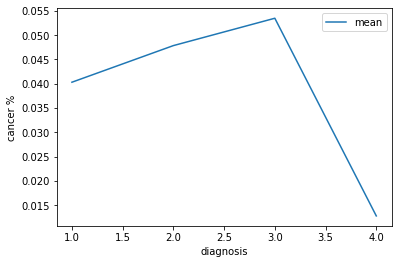

In [17]:
sns.lineplot(data=data_q4, x='diagnosis', y='mean_v', label='mean')
plt.ylabel('cancer %')

# Question 5: Which type of IBD has more heart disease sufferers?


In [18]:
data_q5 = data[['diagnosis', 'heart_disease']].copy()
data_q5.heart_disease = data_q5.heart_disease == 'Yes'
data_q5.head()

,diagnosis,heart_disease
0,2.0,False
1,1.0,False
2,2.0,False
3,1.0,False
4,2.0,False


In [19]:
data_q5 = data_q5.groupby('diagnosis').agg(['mean', 'median'])
data_q5.columns = ['mean_v', 'median_v']
data_q5.reset_index(inplace=True)
data_q5.head()

,diagnosis,mean_v,median_v
0,1.0,0.032647,0.0
1,2.0,0.050010,0.0
2,3.0,0.039354,0.0
3,4.0,0.025641,0.0


Text(0, 0.5, 'heart disease %')

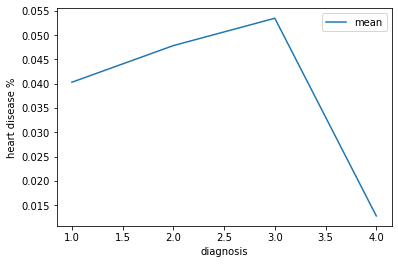

In [20]:
sns.lineplot(data=data_q4, x='diagnosis', y='mean_v', label='mean')
plt.ylabel('heart disease %')

# Question 6: Which age group is most affected by Ulcerative colitis (diagnosis type 2 in the dataset)?
## (comparing male and female)

In [21]:
data_q6 = data[['gender', 'diagnosis', 'age_band_jan1']].copy()
data_q6 = data_q6[data_q6.diagnosis == 2]
data_q6 = data_q6.groupby(['age_band_jan1', 'gender']).count().reset_index()
data_q6.columns = [*data_q6.columns[:-1], 'n_patient']
data_q6.head()

,age_band_jan1,gender,n_patient
0,15-19,1.0,41
1,15-19,2.0,37
2,20-24,1.0,341
3,20-24,2.0,325
4,25-29,1.0,515


<AxesSubplot:xlabel='age_band_jan1', ylabel='n_patient'>

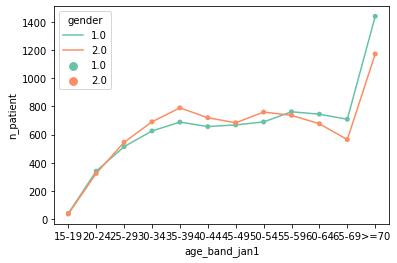

In [22]:
sns.lineplot(data=data_q6, x='age_band_jan1', y='n_patient', hue='gender', palette='Set2')
sns.stripplot(data=data_q6, x='age_band_jan1', y='n_patient', hue='gender', jitter=False, palette='Set2')